<div>
<table style="width: 100%">
    <td>
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="30">WSD 2024-2025</font><center>
                    <center><font size="30">AI 4 Water Systems</font><center></td>
			</tr>
			<tr>
                <td><center><font size="5">Jupyter Notebook 1</font><center></td>
			</tr>
			<tr>
                <td><center><font size="10">Data Analysis</font><center></td>
			</tr>
            <tr>
                <td><center><font size="5">Claudia Bertini, Lecturer in Hydroinformatics</font><center></td>
			</tr> 
		</table>
		<td> <img src='ihe-logo-square.png'></img></td>
	</tr>
</table>
</div>  

# 1. Installing and importing the libraries needed
Before importing the libraries below, you might need to install them. You can use the following commands (the code to be run is in the following cells):
pip install matplotlib
pip install pandas
pip install openpyxl

The library os should be automatically installed. If it is not the case, you can add a cell and type "pip install os", then run it.

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---------------------- ----------------- 143.4/250.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2. Load the data
To load the data correctly, first make sure that the file "Sieve-orig.xlsx" is saved in the same folder of this notebook. If it's not the case, please move the file to the folder of this notebook.
The file contains the hourly records of discharge (Qt) and effective precipitation (REt), from 1 Dec 1969 to 28 Feb 1970. There is also one column providing information about date and time.
In the first lines of the next cell, you will find information to be able to open this notebook in Google Colab, in case you prefer it.

In [19]:
# Define file path and check environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = '/content/drive/My Drive/'
else:
    base_path = os.getcwd()  # Use current directory in Jupyter Notebook = directory where the notebook is locally saved in your computer

# Ensure file exists before reading
file_name = 'Sieve-orig.xlsx'
file_path = os.path.join(base_path, file_name)

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# First load the file with the data from Sieve
df = pd.read_excel(file_path)


# 3. Plot the data
We will now plot the discharge and the rainfall time series in the same graph, making sure that the discharge is referred to the primary y-axis, while rainfall refers to the secondary y-axis. Additionally, we want the secondary y-axis to be in inverse order and we want to draw the precipitation as bars. 
Below you find an example of the plot. You can look at this link https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py to check the named colors and change them yourself. Additional tutorials on how to plot figures are here https://matplotlib.org/stable/tutorials/index.html.
At the end of the plot, there is a line to save the figure locally in your computer, in the folder where your notebook is.

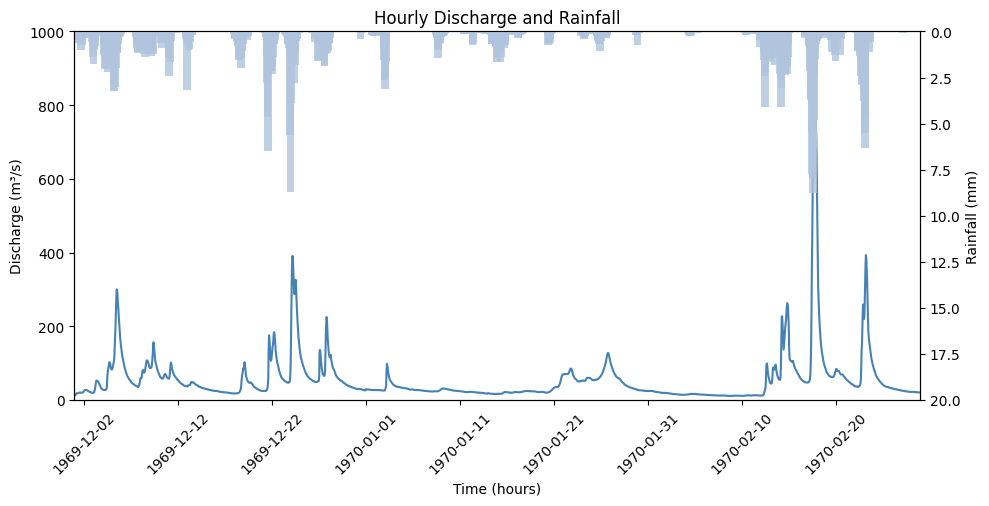

<Figure size 640x480 with 0 Axes>

In [20]:
# initialize the figure
fig, ax1 = plt.subplots(figsize=(10, 5))
# Plot discharge on the primary y-axis
ax1.plot(df['Date'], df['Qt'], color='steelblue', label='Discharge (m³/s)')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Discharge (m³/s)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 1000)  
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=10))
plt.xticks(rotation=45)
ax1.set_xlim(df['Date'].loc[0], df['Date'].loc[len(df)-1])  # Set x-axis limits

# Create secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['REt'], color='lightsteelblue',alpha=0.8, label='Rainfall (mm)')
ax2.set_ylabel('Rainfall (mm)')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 20)  # 
ax2.invert_yaxis()  # Invert the secondary y-axis

# Show the plot
fig.tight_layout()
plt.title('Hourly Discharge and Rainfall')
plt.show()
plot_path = os.path.join(base_path, 'Rainfall-Discharge_Plot.png')
# save the plot on your local folder
plt.savefig(plot_path, dpi=600, format='png')

# 4. Cross-correlation analysis
We will now analyse the correlation between our target (Qt+1) and past rainfall (REt). More specifically, we want to analyse the correlation with past rainfall up to 9 steps in the past (REt-9). We can do it automatically in a loop, using the pandas library.
This step is important because it gives a starting information on how many steps in the past (commonly referred as "input features") we should use to train our data driven models (we will see this part in the next notebooks). In case correlation is high, we have a good reason to believe that that specific variable is important to predict our target. In case correlation is low, it might be less relevant. Be careful, however, to remind that correlation measures the linear relationship between two variables. It might then happen that two variables are highly linked but not in a linear manner, and hence their linear correlation results low.

In [24]:
# Compute correlation between discharge and past rainfall steps
correlations = {} # define empty dictionary where we store the correlation results
for lag in range(1, 10):  # 10 steps back
    df[f'REt_lag{lag}'] = df['REt'].shift(lag)
    correlations[f'{lag}'] = df[['Qt', f'REt_lag{lag}']].corr().iloc[0, 1]

# Print correlation results
for lag, corr in correlations.items():
    print(f'Correlation with {lag}: {corr:.3f}')


Correlation with 1: 0.522
Correlation with 2: 0.598
Correlation with 3: 0.666
Correlation with 4: 0.715
Correlation with 5: 0.743
Correlation with 6: 0.750
Correlation with 7: 0.742
Correlation with 8: 0.722
Correlation with 9: 0.695


We can now plot the correlation coefficient across the different lags (time steps back in time). Also in this case, the plot is automatically saved in the folder where you have your jupyter notebook.

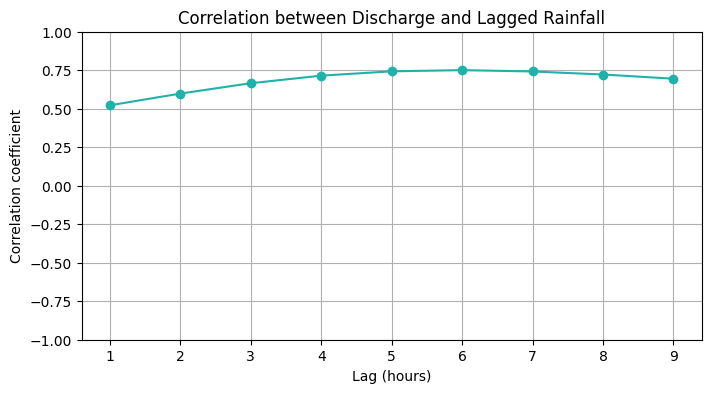

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot correlation over different lags
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(list(correlations.keys()), list(correlations.values()), marker='o', linestyle='-', color='lightseagreen')
ax.set_xlabel('Lag (hours)')
ax.set_ylabel('Correlation coefficient')
ax.set_ylim(-1,1)
ax.set_title('Correlation between Discharge and Lagged Rainfall')
ax.grid(True)
plt.show()
correlation_plot_path = os.path.join(base_path, 'Rainfall-Discharge_Correlation.png')
plt.savefig(correlation_plot_path, dpi=600, format='png')


<b>How many of the past rainfall time steps should we take to build our data driven model? </b>
We can see that we have high correlation up to 6 hours back, so we could take all the first 6 lags of rainfall.

# 5. Autocorrelation analysis
Apart from past rainfall, also past discharge data might hold relevant information that could help our data driven model simulate better our target (Qt+1). We then analyse the autocorrelation of the discharge, which is the correlation between our target (Qt+1) and past discharge time steps (Qt). We analyse the autocorrelation up to 14 steps in the past (Qt-9). Please note that you can analyse as many time steps as you want. Practically, we use the same loop as before to compute the autocorrelation and we then plot it.

In [25]:
qcorrelations = {} # define empty dictionary where we store the autocorrelation results
for lag in range(1, 15):  # 14 steps back
    df[f'Qt_lag{lag}'] = df['Qt'].shift(lag)
    qcorrelations[f'{lag}'] = df[['Qt', f'Qt_lag{lag}']].corr().iloc[0, 1]

# Print correlation results
for lag, corr in qcorrelations.items():
    print(f'Correlation with {lag}: {corr:.3f}')

Correlation with 1: 0.990
Correlation with 2: 0.962
Correlation with 3: 0.923
Correlation with 4: 0.878
Correlation with 5: 0.830
Correlation with 6: 0.781
Correlation with 7: 0.732
Correlation with 8: 0.682
Correlation with 9: 0.632
Correlation with 10: 0.581
Correlation with 11: 0.531
Correlation with 12: 0.482
Correlation with 13: 0.438
Correlation with 14: 0.399


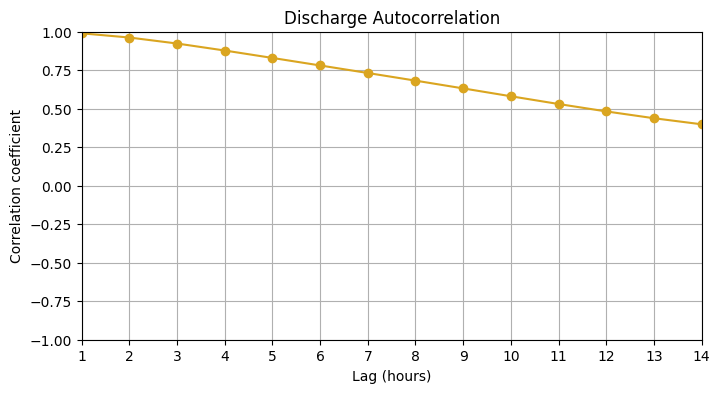

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot correlation over different lags
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(list(qcorrelations.keys()), list(qcorrelations.values()), marker='o', linestyle='-', color='goldenrod')
ax.set_xlabel('Lag (hours)')
ax.set_ylabel('Correlation coefficient')
ax.set_ylim(-1,1)
ax.set_xlim(0,13)
ax.set_title('Discharge Autocorrelation')
ax.grid(True)
plt.show() 
autocorr_plot_path = os.path.join(base_path, 'Discharge_Autocorrelation.png')
plt.savefig(autocorr_plot_path, dpi=600, format='png')

<b>How many of the past discharge time steps should we take to build our data driven model? </b>
We can see that we have high correlation up to 6 hours back, so in principle we could take all the first 6 lags of discharge.

# 6. Conclusion
We have learnt how to plot our data and how to define, at least as first guess, which variables can be considered as input features for a data driven model.
You can explore further and plot the data on scatter plots, with Qt+1 on the x-axis and one input variable on the y-axis. If they are aligned, there is a close linear relationship between the two. You can also extend the correlation analysis for more time lags.
We will use this information in the next notebook, to build our first data driven model.